<a href="https://colab.research.google.com/github/Soniprincy/Machine-Learning/blob/main/K_Means_%7C_income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#k means

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('income.csv')
df.head(4)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000


In [3]:
df.shape

(22, 3)

In [4]:
df.rename(columns={'Age':'age',"Income($)":'income'}, inplace=True)

In [5]:
df.head(3)

,Name,age,income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000


In [6]:
df.drop('Name',axis=1, inplace=True)

In [7]:
df.head(3)

,age,income
0,27,70000
1,29,90000
2,29,61000


Text(0, 0.5, 'Income')

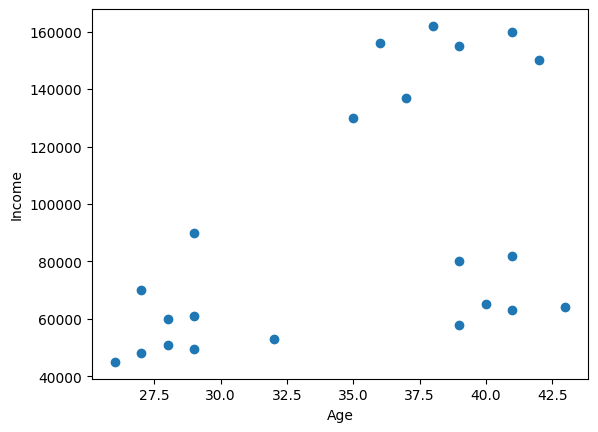

In [8]:
plt.scatter(df.age, df.income)
plt.xlabel("Age")
plt.ylabel("Income")

In [9]:
#k = 3

km = KMeans(n_clusters=3) #0,1,2
cols = df[['age','income']]
y_pred = km.fit_predict(cols)
y_pred

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [10]:
df['cluster'] = y_pred
df.head(5)

,age,income,cluster
0,27,70000,0
1,29,90000,2
2,29,61000,0
3,28,60000,0
4,42,150000,1


In [11]:
#centroid

km.cluster_centers_

array([[3.24166667e+01, 5.72916667e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.63333333e+01, 8.40000000e+04]])

In [12]:
x = km.cluster_centers_[:,0]
y = km.cluster_centers_[:,1]

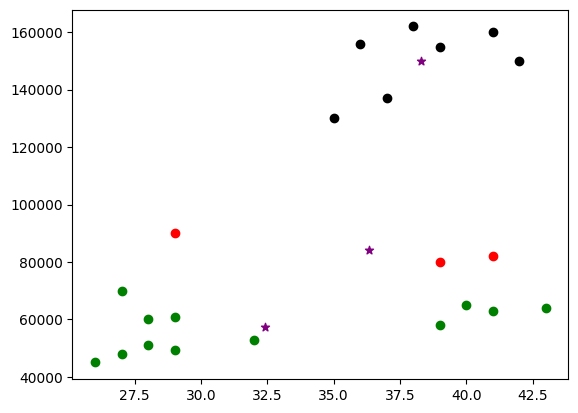

In [13]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['age'],df1['income'],color = 'green')

plt.scatter(df2['age'],df2['income'],color = 'black')

plt.scatter(df3['age'],df3['income'],color = 'red')

#plot centroid
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple', marker="*", label ='Centroid')

In [14]:
scaler = MinMaxScaler()

scaler.fit(df[['income']])
df['income'] = scaler.transform(df[['income']])

scaler.fit(df[['age']])
df['age'] = scaler.transform(df[['age']])

In [15]:
df.head(5)

,age,income,cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,2
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1


Text(0, 0.5, 'Income')

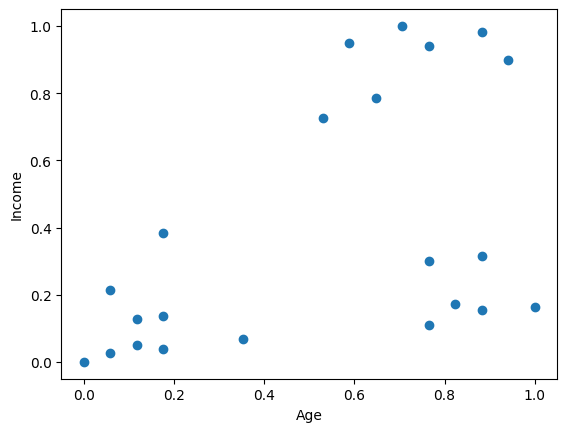

In [16]:
plt.scatter(df.age, df.income)
plt.xlabel("Age")
plt.ylabel("Income")

In [17]:
km = KMeans(n_clusters=3) #0,1,2
cols = df[['age','income']]
y_pred = km.fit_predict(cols)
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [18]:
df['cluster'] = y_pred
df.head(5)

,age,income,cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1


In [19]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

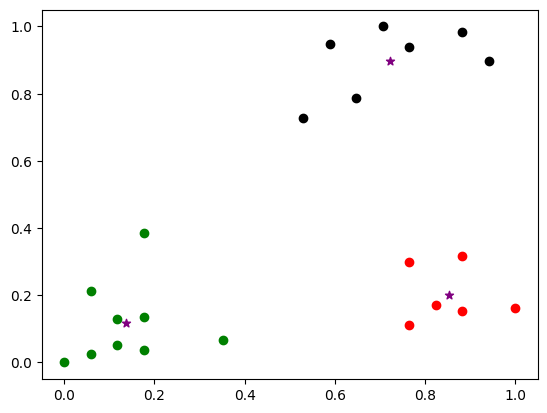

In [20]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['age'],df1['income'],color = 'green')

plt.scatter(df2['age'],df2['income'],color = 'black')

plt.scatter(df3['age'],df3['income'],color = 'red')

#plot centroid
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple', marker="*", label ='Centroid')

Text(0.5, 1.0, ' Silhouette plot')

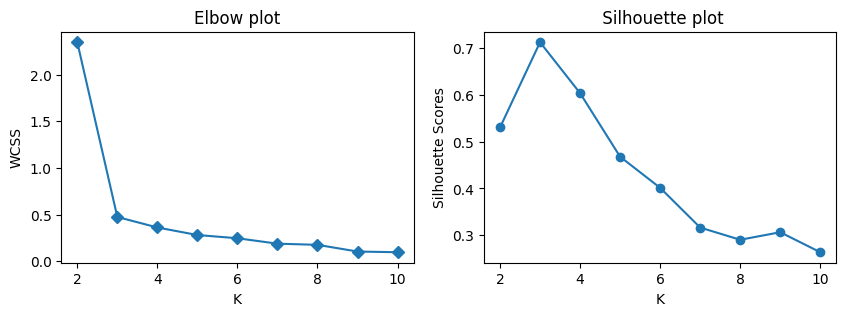

In [21]:
import warnings

warnings.filterwarnings("ignore",category=Warning)
import numpy as np
from sklearn.metrics import silhouette_score

#elbow
sse = []  #ELBOW
silhouette_scores = []  #SHILOUTEE SCORE

k_range = range(2,11)
cols = df[['age','income']]

for k in k_range:
    #elbow plot
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(cols)
    sse.append(kmeans.inertia_)  #explain in 5 mniutes


#     #shil score
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(df[['age','income']],labels)
    silhouette_scores.append(silhouette_avg)


#plot
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,3))

#elbow plot
ax1.plot(k_range, sse, marker='D')
ax1.set_xlabel('K')
ax1.set_ylabel('WCSS')
ax1.set_title("Elbow plot")



#SHil plot
ax2.plot(k_range, silhouette_scores, marker='o')
ax2.set_xlabel('K')
ax2.set_ylabel('Silhouette Scores')
ax2.set_title(" Silhouette plot")